[参考](https://www.kaggle.com/miteshyadav/comprehensive-eda-with-xgboost-top-10-percentile)。

In [1]:
import pandas as pd

train_df=pd.read_csv('../input/train.csv')

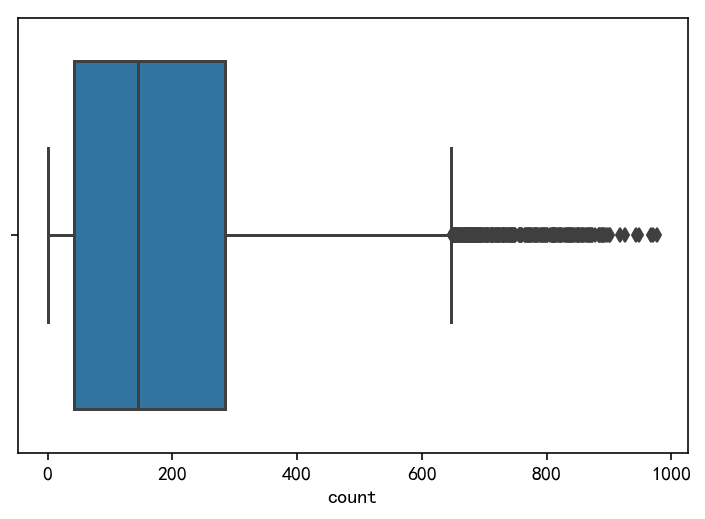

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import boxcox, inv_boxcox

sns.boxplot(train_df['count'])
plt.show()

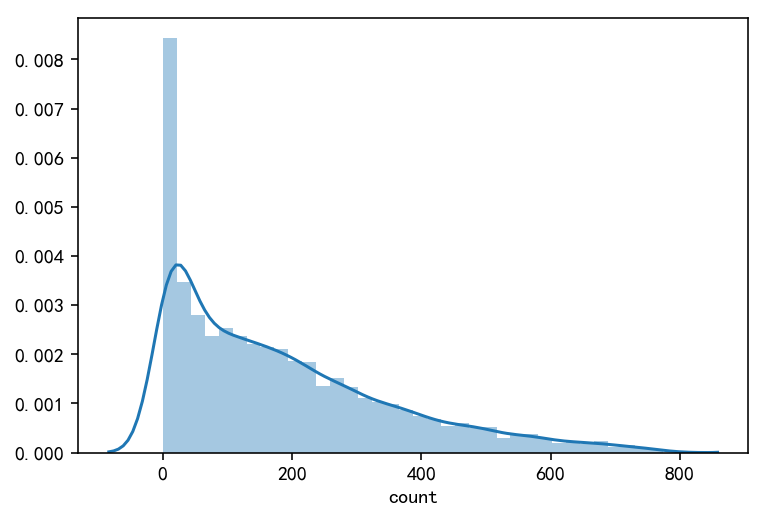

In [3]:
cnt=train_df['count'].values
q99=np.percentile(cnt,[99])


train_df=train_df[train_df['count']<q99[0]]
sns.distplot(train_df['count'])
plt.show()

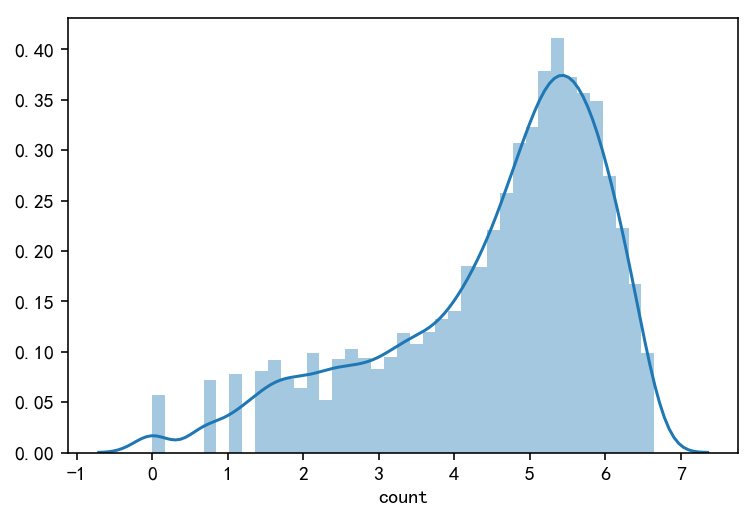

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
5        0.000000
6        0.693147
7        1.098612
8        2.079442
9        2.639057
10       3.583519
11       4.025352
12       4.430817
13       4.543295
14       4.663439
15       4.700480
16       4.532599
17       4.204693
18       3.555348
19       3.610918
20       3.583519
21       3.526361
22       3.332205
23       3.663562
24       2.833213
25       2.833213
26       2.197225
27       1.791759
28       1.098612
29       0.693147
           ...   
10856    6.263398
10857    5.866468
10858    5.590987
10859    5.123964
10860    4.882802
10861    4.394449
10862    3.713572
10863    2.708050
10864    1.098612
10865    1.609438
10866    1.945910
10867    3.433987
10868    4.718499
10869    5.894403
10870    6.519147
10871    5.758902
10872    5.099866
10873    5.298317
10874    5.463832
10875    5.361292
10876    5.384495
10877    5.468060
10878    5.811141
10879    6.331502
10880    6

In [4]:
#from scipy.stats import boxcox
train_df['count']=train_df['count'].apply(lambda x:np.log(x))
#train_df['count']=boxcox(train_df['count'])[0]
sns.distplot(train_df['count'])
plt.show()
print (train_df['count'])

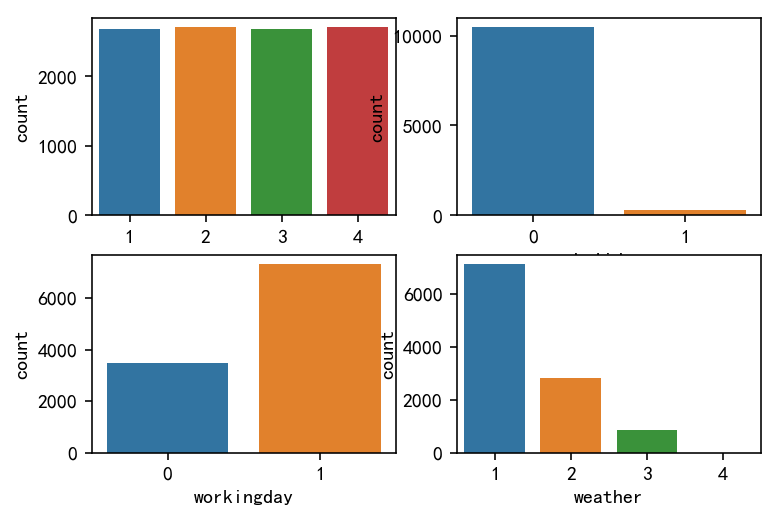

In [5]:
cat_names=['season', 'holiday', 'workingday', 'weather']

i=0
for name in cat_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.countplot(name,data=train_df) 
    
plt.show()

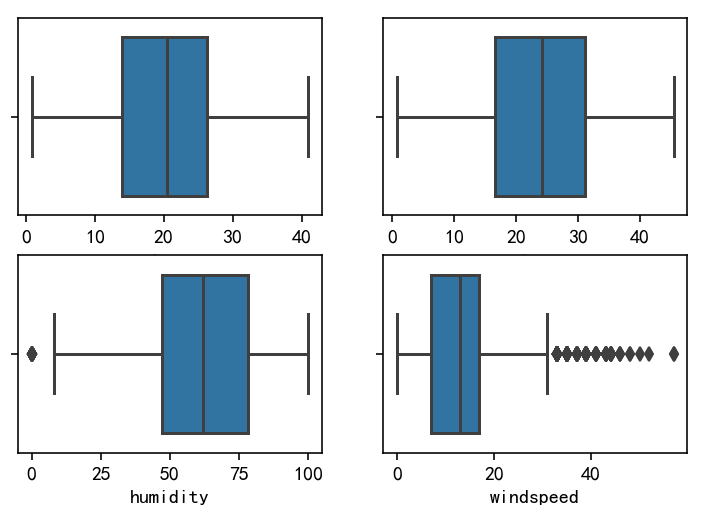

In [6]:
cont_names=['temp','atemp','humidity','windspeed']

        
#sns.boxplot(train_df['season'])   
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=train_df) 
    
plt.show()


In [10]:
from datetime import datetime

train_df['datetime'] = train_df['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
time_series_df = train_df
time_series_df.index = train_df['datetime']

TypeError: strptime() argument 1 must be str, not Timestamp

In [11]:
import matplotlib.pyplot as plt

#Applying rolling average on a period of 60 days, as the typical weather lasts for around 3 months (20 days in training data of each month)
plt.plot(pd.rolling_mean(time_series_df['count'], 60))
plt.show()

AttributeError: module 'pandas' has no attribute 'rolling_mean'

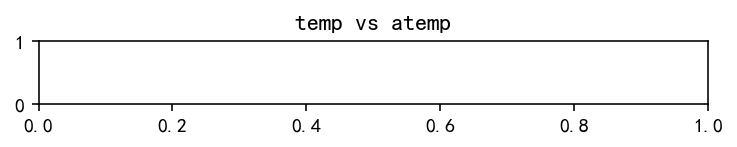

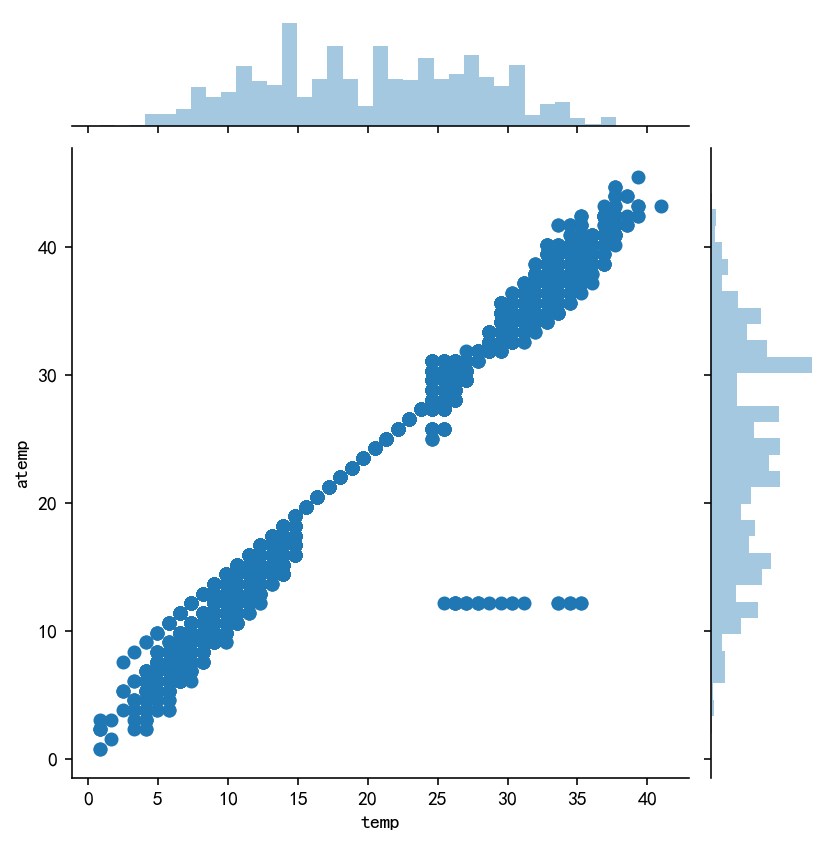

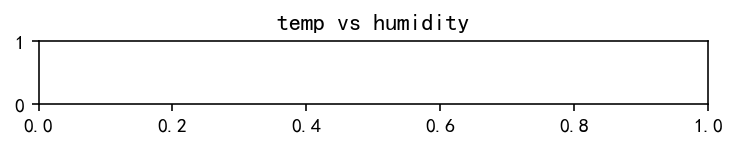

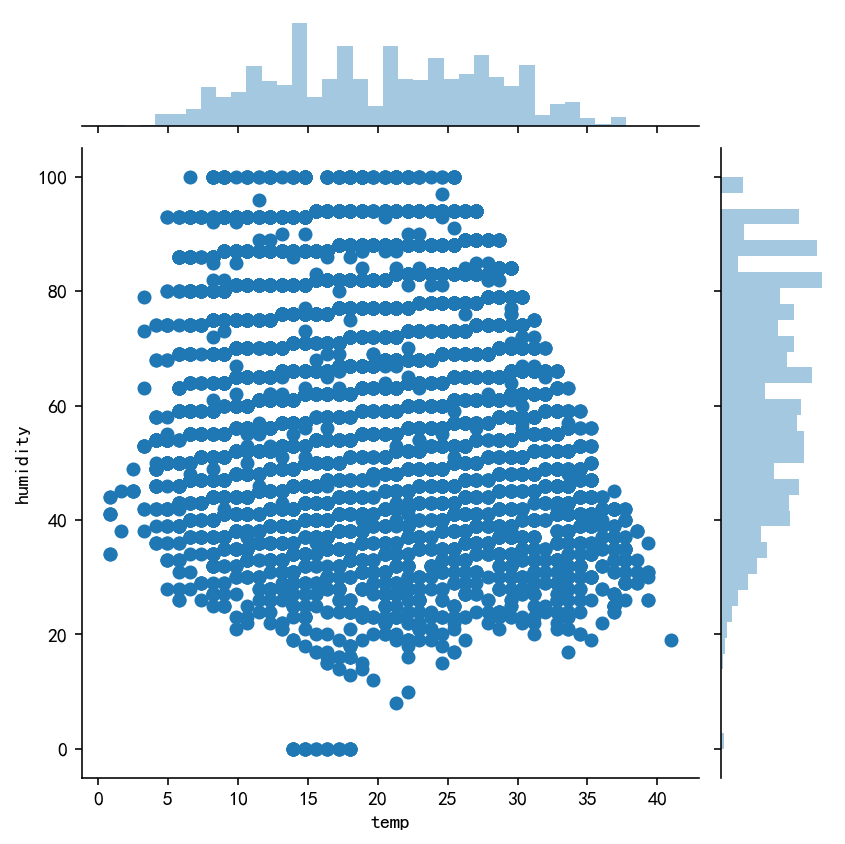

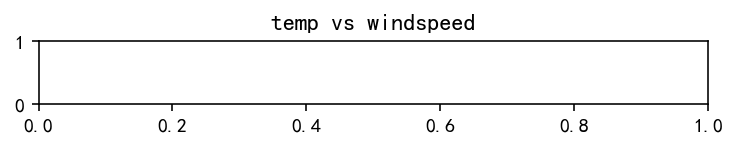

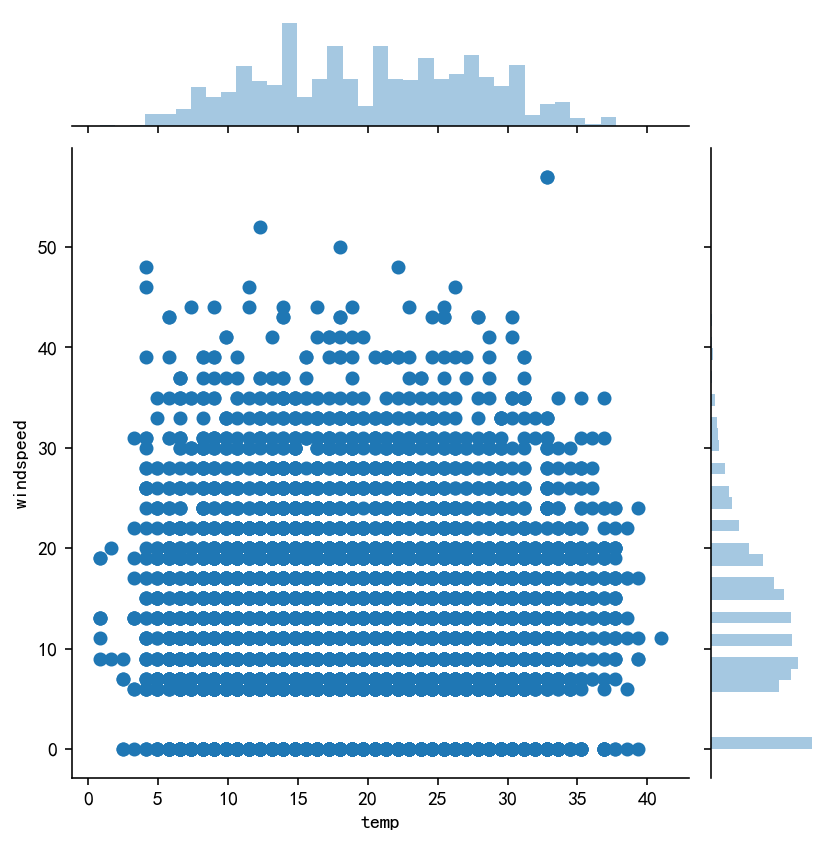

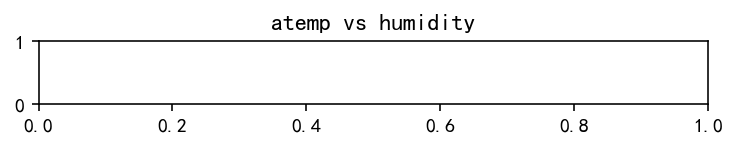

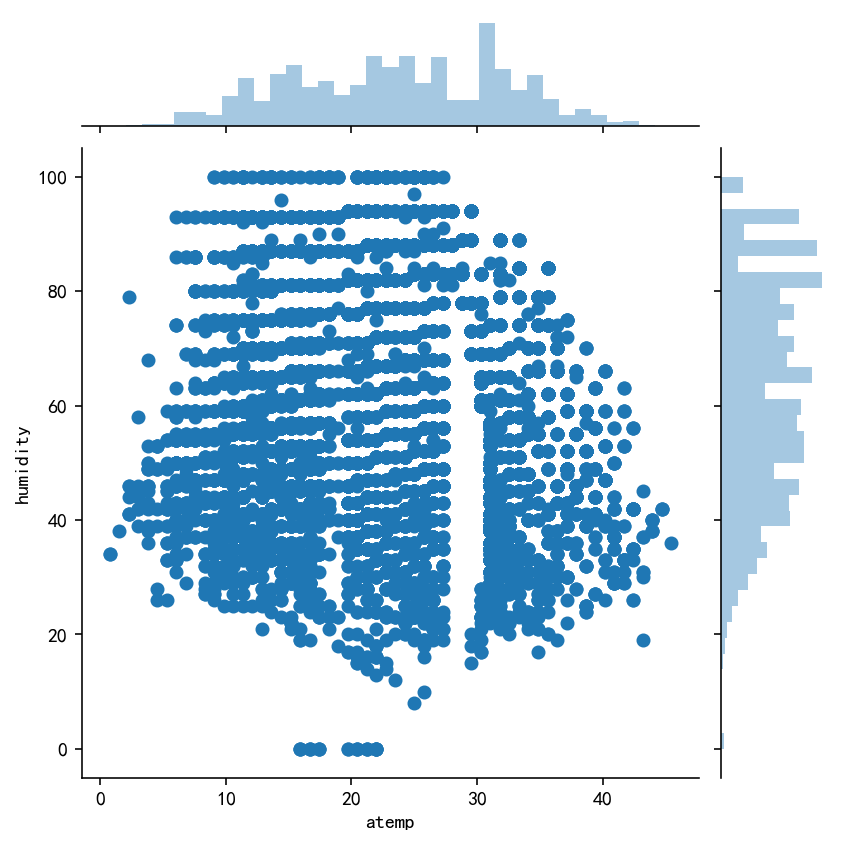

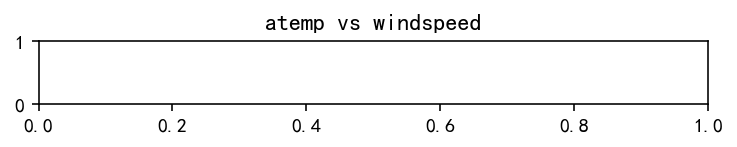

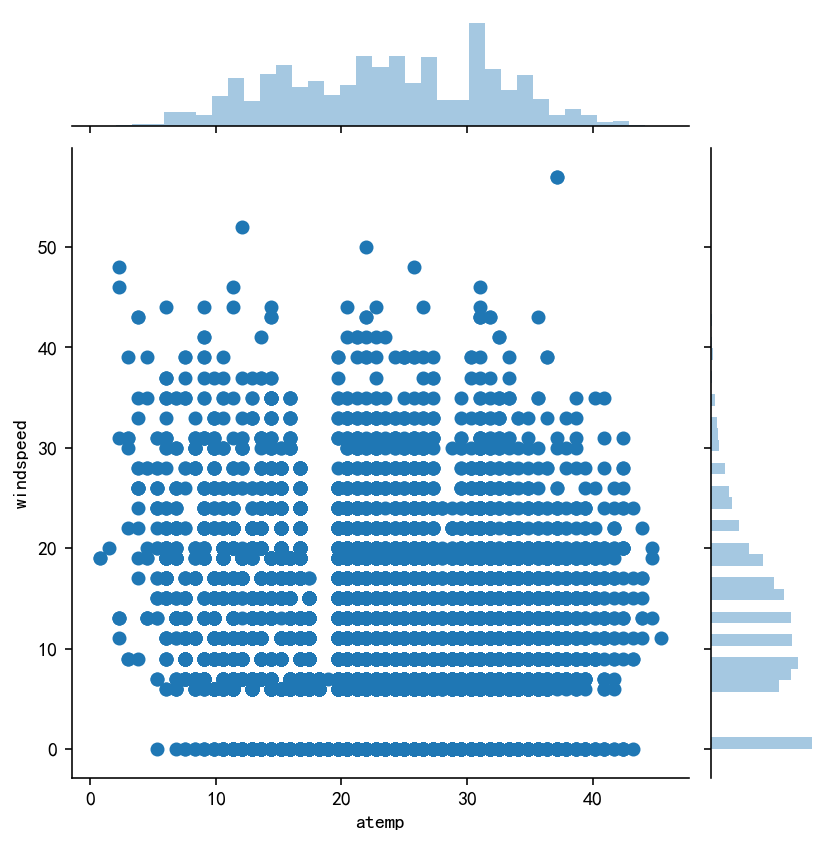

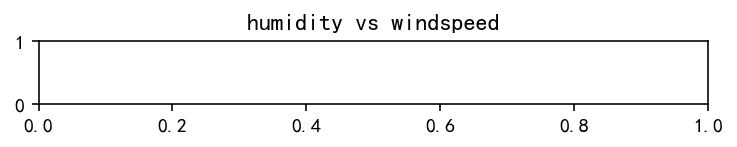

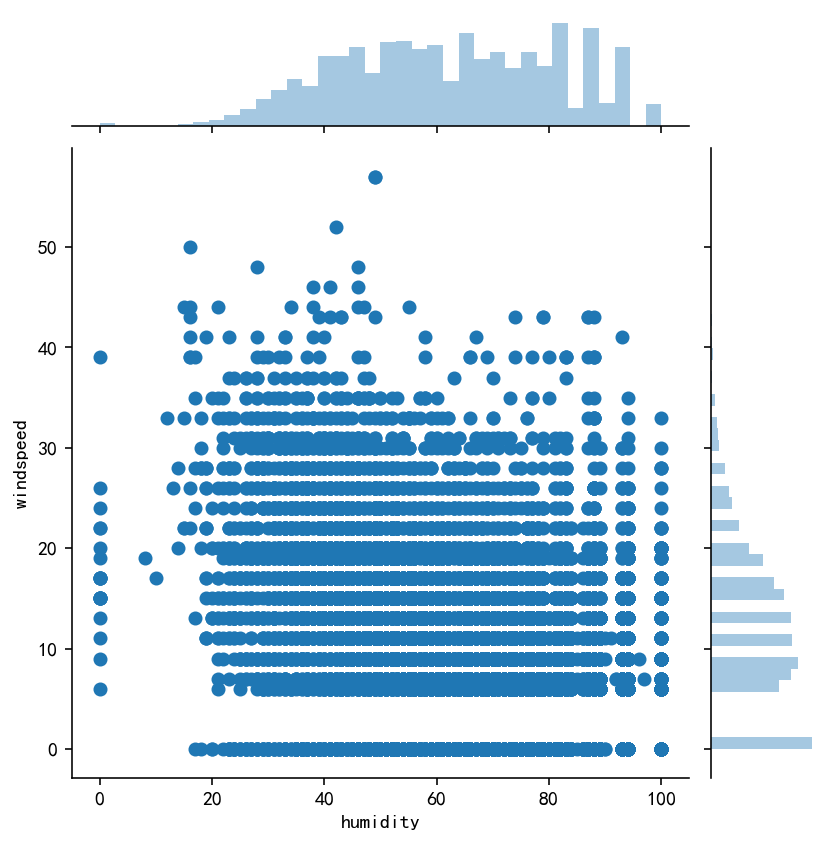

In [12]:
i = 1
for name_1 in cont_names:
    j = cont_names.index(name_1)

    while (j < len(cont_names) - 1):

        plt.subplot(6, 1, i)
        plt.title(name_1 + ' vs ' + cont_names[j + 1])
        sns.jointplot(x=name_1, y=cont_names[j + 1], data=train_df)
        j = j + 1
        i = i + 1
        plt.show()

In [13]:
from datetime import datetime

#converting string dattime to datetime


#train_df['datetime']=train_df['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

new_df=train_df

new_df['month']=new_df['datetime'].apply(lambda x:x.month)
new_df['hour']=new_df['datetime'].apply(lambda x:x.hour)
new_df['day']=new_df['datetime'].apply(lambda x:x.day)
new_df['year']=new_df['datetime'].apply(lambda x:x.year)
#new_df['weekday_flag']=new_df['datetime'].apply(weekday_flag)
new_df['mnth+day']=new_df['datetime'].apply(lambda x:str(x.month)+'_'+str(x.day))

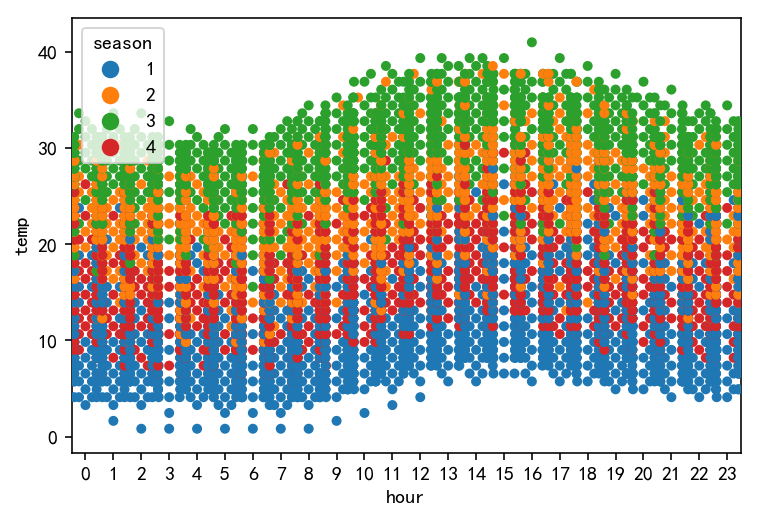

In [14]:
sns.swarmplot(x='hour',y='temp',data=new_df,hue='season')
plt.show()

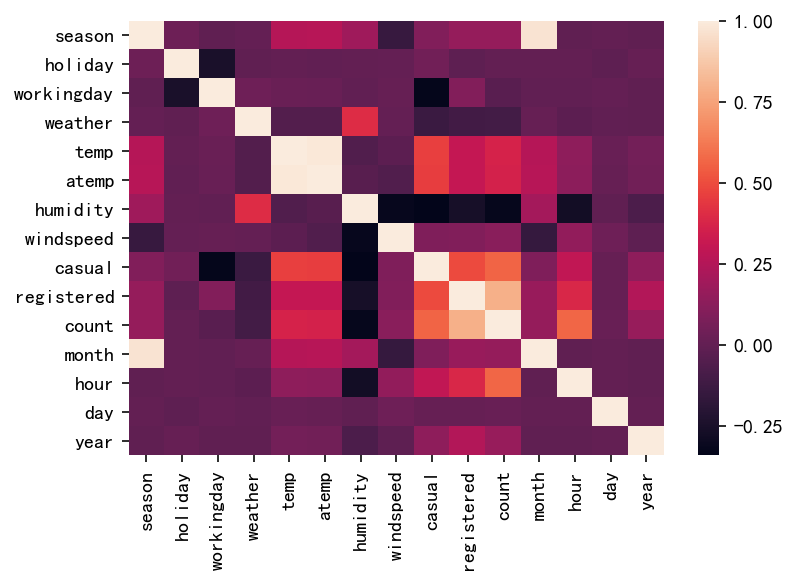

In [15]:
new_df.cov()
sns.heatmap(new_df.corr())
plt.show()

In [16]:
new_df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,year
season,1.000000,0.030145,-0.010817,0.008974,0.258755,0.264946,0.192384,-0.147584,0.094874,0.160850,0.157441,0.971723,-0.008572,0.001907,-0.008825
holiday,0.030145,1.000000,-0.249987,-0.007546,0.002004,-0.003614,0.000788,0.008659,0.046419,-0.015456,0.002128,0.002389,0.000935,-0.015656,0.013820
workingday,-0.010817,-0.249987,1.000000,0.035943,0.023581,0.018510,-0.006626,0.012621,-0.330633,0.101270,-0.028357,-0.005883,-0.002239,0.008881,-0.009251
weather,0.008974,-0.007546,0.035943,1.000000,-0.052743,-0.053423,0.405825,0.007399,-0.134227,-0.108182,-0.103790,0.012510,-0.020862,-0.006143,-0.010069
temp,0.258755,0.002004,0.023581,-0.052743,1.000000,0.985282,-0.058217,-0.019430,0.461425,0.307082,0.365795,0.257081,0.138337,0.014515,0.051975
atemp,0.264946,-0.003614,0.018510,-0.053423,0.985282,1.000000,-0.037285,-0.059061,0.457020,0.304222,0.361851,0.263763,0.133509,0.011276,0.049660
humidity,0.192384,0.000788,-0.006626,0.405825,-0.058217,-0.037285,1.000000,-0.319597,-0.342272,-0.262680,-0.323366,0.206496,-0.274304,-0.008549,-0.072691
windspeed,-0.147584,0.008659,0.012621,0.007399,-0.019430,-0.059061,-0.319597,1.000000,0.091620,0.094089,0.120141,-0.151158,0.146080,0.035797,-0.016638
casual,0.094874,0.046419,-0.330633,-0.134227,0.461425,0.457020,-0.342272,0.091620,1.000000,0.495236,0.562300,0.090319,0.295752,0.011213,0.134985
registered,0.160850,-0.015456,0.101270,-0.108182,0.307082,0.304222,-0.262680,0.094089,0.495236,1.000000,0.792261,0.167515,0.383665,0.013990,0.245989


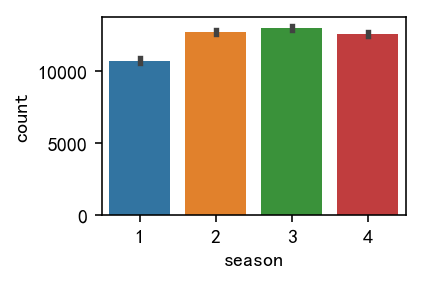

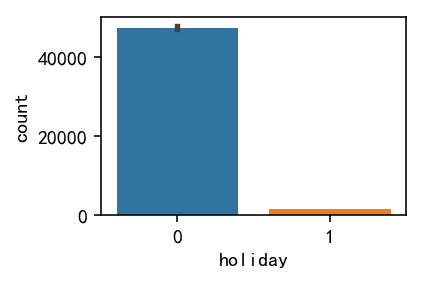

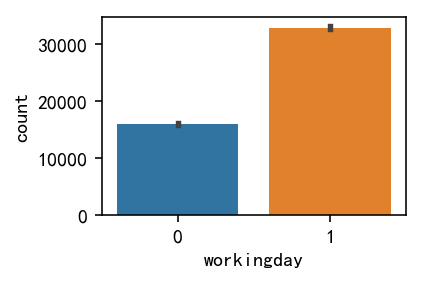

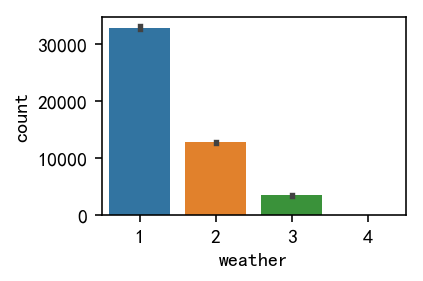

In [17]:
cat_names=['season', 'holiday', 'workingday', 'weather']
i=1
for name in cat_names:
    plt.subplot(2,2,i)
    sns.barplot(x=name,y='count',data=new_df,estimator=sum)
    i=i+1
    plt.show()

In [18]:
final_df=new_df.drop(['datetime','temp','windspeed','casual','registered','mnth+day','day'], axis=1)
final_df.head()

,season,holiday,workingday,weather,atemp,humidity,count,month,hour,year
datetime,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,14.395,81,2.772589,1,0,2011
2011-01-01 01:00:00,1,0,0,1,13.635,80,3.688879,1,1,2011
2011-01-01 02:00:00,1,0,0,1,13.635,80,3.465736,1,2,2011
2011-01-01 03:00:00,1,0,0,1,14.395,75,2.564949,1,3,2011
2011-01-01 04:00:00,1,0,0,1,14.395,75,0.000000,1,4,2011


In [19]:
weather_df=pd.get_dummies(new_df['weather'],prefix='w',drop_first=True)
year_df=pd.get_dummies(new_df['year'],prefix='y',drop_first=True)
month_df=pd.get_dummies(new_df['month'],prefix='m',drop_first=True)
hour_df=pd.get_dummies(new_df['hour'],prefix='h',drop_first=True)
season_df=pd.get_dummies(new_df['season'],prefix='s',drop_first=True)
                     


final_df=final_df.join(weather_df)
final_df=final_df.join(year_df)
final_df=final_df.join(month_df)                     
final_df=final_df.join(hour_df)
final_df=final_df.join(season_df)
                     
final_df.head()

,season,holiday,workingday,weather,atemp,humidity,count,month,hour,year,...,h_17,h_18,h_19,h_20,h_21,h_22,h_23,s_2,s_3,s_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,14.395,81,2.772589,1,0,2011,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,13.635,80,3.688879,1,1,2011,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,1,0,0,1,13.635,80,3.465736,1,2,2011,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,1,0,0,1,14.395,75,2.564949,1,3,2011,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,1,0,0,1,14.395,75,0.000000,1,4,2011,...,0,0,0,0,0,0,0,0,0,0


In [20]:
final_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity',
       'count', 'month', 'hour', 'year', 'w_2', 'w_3', 'w_4', 'y_2012', 'm_2',
       'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12',
       'h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 'h_10',
       'h_11', 'h_12', 'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19',
       'h_20', 'h_21', 'h_22', 'h_23', 's_2', 's_3', 's_4'],
      dtype='object')

In [21]:
X=final_df.iloc[:,final_df.columns!='count'].values
print (X)

Y=final_df.iloc[:,6].values

print (Y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [4. 0. 1. ... 0. 0. 1.]
 [4. 0. 1. ... 0. 0. 1.]
 [4. 0. 1. ... 0. 0. 1.]]
[2.77258872 3.68887945 3.4657359  ... 5.12396398 4.8598124  4.47733681]


In [22]:
import xgboost as xg
from sklearn.model_selection import GridSearchCV


def grid_search():
    print('lets go')

    xgr = xg.XGBRegressor(max_depth=8, min_child_weight=6, gamma=0.4)
    xgr.fit(X, Y)

    #rf=RandomForestRegressor(n_estimators=100,random_state=0)
    #rf.fit(X,Y)

    #parameters=[{'max_depth':[8,9,10,11,12],'min_child_weight':[4,5,6,7,8]}]
    #parameters=[{'gamma':[i/10.0 for i in range(0,5)]}]
    parameters = [{
        'subsample': [i / 10.0 for i in range(6, 10)],
        'colsample_bytree': [i / 10.0 for i in range(6, 10)]
    }]

    grid_search = GridSearchCV(
        estimator=xgr, param_grid=parameters, cv=10, n_jobs=-1)

    print(1)
    grid_search = grid_search.fit(X, Y)
    print(2)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    print(best_accuracy)
    print(best_parameters)

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, Y)
imp_list = rf.feature_importances_
feats = {}  # a dict to hold feature_name: feature_importance
for feature, importance in zip(final_df.columns, rf.feature_importances_):
    feats[feature] = importance  #add the name/value pair

In [24]:
import operator

sorted_x = sorted(feats.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_x)

[('month', 0.6845749061301916), ('atemp', 0.05701326543862302), ('workingday', 0.0557271005296765), ('count', 0.03269338883613692), ('humidity', 0.026337317853907787), ('h_3', 0.01641792999688389), ('w_4', 0.01634865195386596), ('hour', 0.014186189494841002), ('season', 0.012307110433862496), ('h_5', 0.011609062709718095), ('h_2', 0.01136586141020507), ('h_4', 0.009635193962593259), ('weather', 0.0066385984288469336), ('h_1', 0.005382205426979103), ('w_2', 0.004741005105013635), ('h_7', 0.004174425908351822), ('m_12', 0.0032904173258109064), ('h_6', 0.0031943735337868406), ('holiday', 0.002334080448699594), ('h_16', 0.0020698045326348192), ('h_17', 0.0015462973958901068), ('year', 0.001442979652064034), ('h_9', 0.0011909165391947528), ('h_22', 0.0009898934896059087), ('m_3', 0.0009636193407063755), ('y_2012', 0.0009217454281715792), ('m_2', 0.0008244098677989796), ('m_9', 0.0008140314758397034), ('m_4', 0.0007952924234623619), ('h_8', 0.0007788954966585205), ('m_8', 0.00075141407027218

In [25]:
import xgboost as xg

xgr = xg.XGBRegressor(
    max_depth=8,
    min_child_weight=6,
    gamma=0.4,
    colsample_bytree=0.6,
    subsample=0.6)
xgr.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=6, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

In [34]:
new_df=pd.read_csv('../input/test.csv')
pred_index = new_df['datetime']
new_df['datetime']=new_df['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


new_df['month']=new_df['datetime'].apply(lambda x:x.month)
new_df['hour']=new_df['datetime'].apply(lambda x:x.hour)
new_df['day']=new_df['datetime'].apply(lambda x:x.day)
new_df['year']=new_df['datetime'].apply(lambda x:x.year)
#new_df['weekday_flag']=new_df['datetime'].apply(weekday_flag)
#new_df['mnth+day']=new_df['datetime'].apply(lambda x:str(x.month)+'_'+str(x.day))

print (new_df.head())

             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  month  hour  day  year  
0        56    26.0027      1     0   20  2011  
1        56     0.0000      1     1   20  2011  
2        56     0.0000      1     2   20  2011  
3        56    11.0014      1     3   20  2011  
4        56    11.0014      1     4   20  2011  


In [35]:
new_df = new_df.drop(['datetime', 'temp', 'windspeed', 'day'], axis=1)
new_df.head()

,season,holiday,workingday,weather,atemp,humidity,month,hour,year
0,1,0,1,1,11.365,56,1,0,2011
1,1,0,1,1,13.635,56,1,1,2011
2,1,0,1,1,13.635,56,1,2,2011
3,1,0,1,1,12.880,56,1,3,2011
4,1,0,1,1,12.880,56,1,4,2011


In [36]:
#adding dummy varibles to categorical variables
weather_df = pd.get_dummies(new_df['weather'], prefix='w', drop_first=True)
yr_df = pd.get_dummies(new_df['year'], prefix='y', drop_first=True)
month_df = pd.get_dummies(new_df['month'], prefix='m', drop_first=True)
hour_df = pd.get_dummies(new_df['hour'], prefix='h', drop_first=True)
season_df = pd.get_dummies(new_df['season'], prefix='s', drop_first=True)

new_df = new_df.join(weather_df)
new_df = new_df.join(yr_df)
new_df = new_df.join(month_df)
new_df = new_df.join(hour_df)
new_df = new_df.join(season_df)

new_df.head()

,season,holiday,workingday,weather,atemp,humidity,month,hour,year,w_2,...,h_17,h_18,h_19,h_20,h_21,h_22,h_23,s_2,s_3,s_4
0,1,0,1,1,11.365,56,1,0,2011,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,13.635,56,1,1,2011,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,13.635,56,1,2,2011,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,12.880,56,1,3,2011,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,12.880,56,1,4,2011,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_test = new_df.iloc[:, :].values
X_test.shape
#print (new_df.columns)

(6493, 50)

In [38]:
y_output = xgr.predict(X_test)
y_output

array([2.2293658, 1.5082304, 1.1350067, ..., 4.8801217, 4.6743984,
       4.307827 ], dtype=float32)

In [41]:
op = pd.DataFrame({'datetime': pred_index, 'count': np.exp(y_output)})
op.to_csv('../output/xgbr_sub1.csv', index=False) # 0.41878